<a href="https://colab.research.google.com/github/dcontrerascaballol/inventos/blob/main/Tarea_3_Daniel_Contreras_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea N° 3 Curso Análisis y Limpieza de datos.
## Posgrado en Data Science UDD

### Profesor responsable: Jorge Alexis Castillo Sepúlveda

### Alumno: Daniel Contreras Caballol

In [ ]:
# Importación de librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creando la data

#### Cada estudiante analizará un set de datos distinto, ya que cada uno/una generará su propia muestra de análisis.

### 1.Usar la librería numpy y el método random.choice para generar una matriz de datos aleatorios de 500 filas y 6 columnas, en donde las entradas sean números enteros tengan como máximo valor 10000.

#### Esto significará que tiene 500 clientes que compran 6 categoríasde productos distintos, en donde cada uno compró entre 1 y 10000 unidades en cierto periodo de tiempo.

* Se utiliza método random choice de la librería numpy

In [ ]:
matriz_datos_random= np.random.choice(10000, (500,6), replace=True)

##### 2.Las categorías de productos son “vegetales”, “leche”, “abarrotes”, “congelados”,”limpieza”, “gourmet”. Nombre las columnas en el orden que usted quiera.

* Posterior a la creación de la matriz se procede a crear el dataframe con los nombres de columnas solicitados

* Se utilizan métodos para realizar una exploración descriptiva de los datos

* Se identifica que hay 500 productos por columna (6).

In [ ]:
pd_data = pd.DataFrame(matriz_datos_random, columns=[ "leche", "congelados", "vegetales","abarrotes", "limpieza","gourmet"])

In [ ]:
pd_data.head(5)

,leche,congelados,vegetales,abarrotes,limpieza,gourmet
0,6759,1588,7659,9004,2716,2213
1,7863,5140,9883,8666,8672,70
2,6031,2410,9576,1611,3983,6804
3,5478,5551,9573,6811,1775,4719
4,1808,2468,8152,6319,7596,3969


In [ ]:
pd_data.describe()

,leche,congelados,vegetales,abarrotes,limpieza,gourmet
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4888.998000,5262.062000,5126.776000,4919.178000,4884.230000,4942.952000
std,2840.827538,2874.900554,2912.215441,2857.841142,2882.410315,2805.202545
min,36.000000,5.000000,26.000000,4.000000,16.000000,33.000000
25%,2538.500000,2859.500000,2719.000000,2459.750000,2393.750000,2428.250000
50%,4991.500000,5369.500000,5340.000000,4802.500000,4825.500000,4979.500000
75%,7274.750000,7831.250000,7716.500000,7269.500000,7415.750000,7223.000000
max,9981.000000,9986.000000,9974.000000,9992.000000,9989.000000,9985.000000


In [ ]:
pd_data.shape

(500, 6)

In [ ]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   leche       500 non-null    int32
 1   congelados  500 non-null    int32
 2   vegetales   500 non-null    int32
 3   abarrotes   500 non-null    int32
 4   limpieza    500 non-null    int32
 5   gourmet     500 non-null    int32
dtypes: int32(6)
memory usage: 11.8 KB


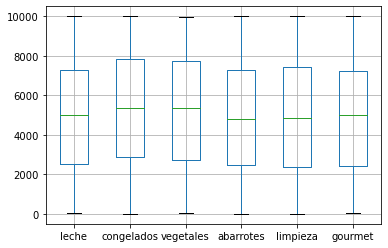

In [ ]:
pd_data.boxplot()

## Preparando lo datos

### 3. Normalizar los datos. (posteriormente se explica mediante anuncios que la referencia es estandarizar)

In [ ]:
#se importa la libreria a utilizar

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(pd_data)
X_scale = scaler.transform(pd_data)
data_scale = pd.DataFrame(X_scale, columns=pd_data.columns)
data_scale.head()

,leche,congelados,vegetales,abarrotes,limpieza,gourmet
0,0.658919,-1.279259,0.870389,1.430770,-0.752981,-0.974149
1,1.047927,-0.042500,1.634834,1.312380,1.315414,-1.738852
2,0.402399,-0.993049,1.529310,-1.158739,-0.312979,0.664092
3,0.207542,0.100604,1.528279,0.662639,-1.079771,-0.079914
4,-1.085629,-0.972855,1.039845,0.490309,0.941742,-0.347543


In [ ]:
data_scale.values

array([[ 0.65891885, -1.27925871,  0.87038891,  1.43076986, -0.75298145,
        -0.97414929],
       [ 1.04792721, -0.04250034,  1.6348335 ,  1.31238031,  1.3154142 ,
        -1.73885208],
       [ 0.40239884, -0.99304943,  1.5293099 , -1.15873871, -0.31297854,
         0.66409174],
       ...,
       [-1.63390488,  1.47768183, -0.50107418,  1.07279911, -0.8075043 ,
        -1.07085225],
       [ 0.4263595 , -0.47738525, -0.24190547,  0.3789243 ,  0.4236009 ,
         0.17165597],
       [ 1.58457551,  1.33144351, -0.30824441,  0.48820695, -0.86862546,
         0.41716018]])

* Dada la solicitud de estandarizar los datos de nuestro dataframe, se utiliza el método StandardScaler de la librería sklearn, posibilitando dar respuesta a la interrogante

### 4. Remover outliers para cada categoría usando el rango intercuartil.

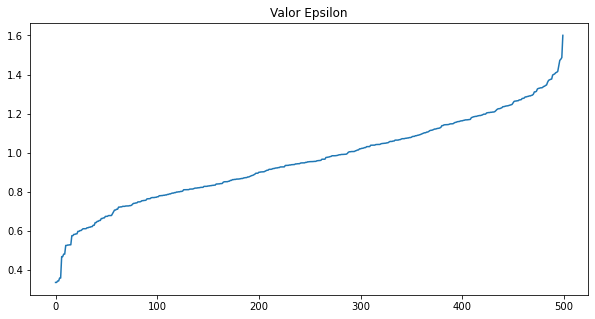

In [ ]:
#Dada la multidemensionalidad de la matriz de datos,
#se utiliza algoritmo de clusterización DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

plt.figure(figsize=(10,5))
plt.title ("Valor Epsilon")
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_scale)
distances, indices = nbrs.kneighbors(data_scale)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

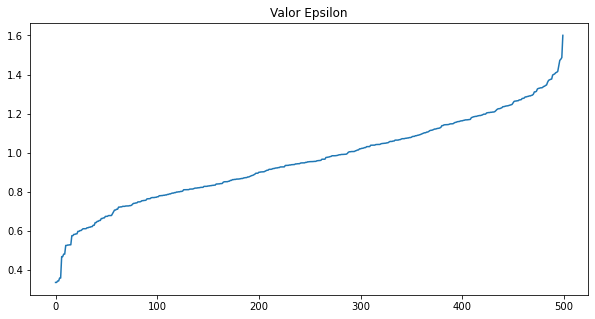

In [ ]:
plt.figure(figsize=(10,5))
plt.title ("Valor Epsilon")
nn = NearestNeighbors(n_neighbors=5).fit(data_scale)
distances, idx = nn.kneighbors(data_scale)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

* Se utilizan algoritmo de Nearest Neighbors  para la elección del valor epsilón, en este caminos, nos da un valor de 1.5, como se puede apreciar en los precedentes gráficos

In [ ]:
covariance_matrix = np.cov(data_scale, rowvar=False)

clustering = DBSCAN(eps=1.5, min_samples=1, metric='mahalanobis',
                    metric_params={'V':covariance_matrix}).fit(data_scale)

lista=clustering.labels_

n_noise_ = list(lista).count(-1)

print('Número estimado de outliers: %d' % n_noise_)

Número estimado de outliers: 0


* Si bien, la solicitud es realizar la eliminación de outliers mediantes el uso del rango intercuartil, dada la matriz de datos, se sugirió utilizar algoritmo de DBSCAN. Para ello, se debe buscar un valor de epsilon, para lo cual, se utilizó el método NearestNeighbors.


* Dado, tales procedimientos se arroja como resultado la no existencia de valores atípicos

## Componentes principales

### 5. Aplicar componentes principales a los datos resultantes luego de haber retirado outliers.
##### Ojo: es sin reducir dimensiones aún.

In [ ]:
from sklearn.decomposition import PCA

data_pca=PCA ()
data_pca.fit(data_scale)


PCA()

* Se utiliza el algortmo de reducción PCA de la librería sklearn

### 6.Interpretar cada dimensión respecto a las categorías, y las varianzas explicadas

Text(0.5, 0, 'Componentes')

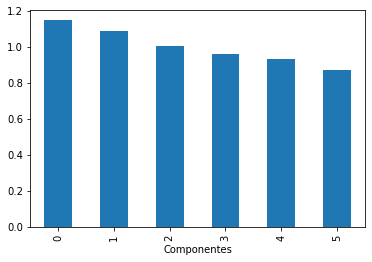

In [ ]:
explained_variance=pd.DataFrame(data_pca.explained_variance_)
ax=explained_variance.plot.bar(legend=False)
ax.set_xlabel("Componentes")

Text(0.5, 0, 'Componentes')

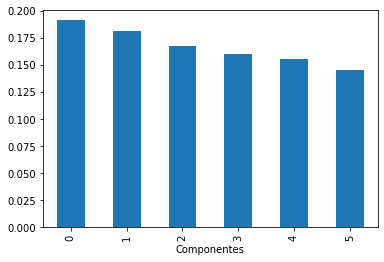

In [ ]:
explained_variance_ratio=pd.DataFrame(data_pca.explained_variance_ratio_)
ax=explained_variance_ratio.plot.bar(legend=False)
ax.set_xlabel("Componentes")

In [ ]:
data_pca.explained_variance_

array([1.14919539, 1.08758975, 1.00630524, 0.96284509, 0.93501457,
       0.87107401])

In [ ]:
data_pca.explained_variance_ratio_

array([0.1911495 , 0.18090243, 0.1673821 , 0.16015323, 0.15552409,
       0.14488864])

### 7. Reducir a dos dimensiones y graficar en el plano, en conjunto con todas las componentes.
##### Interpretar estas componentes conjuntas con las direcciones de las dimensiones originales.

In [ ]:
pca=PCA(n_components=2)
data_fit=pca.fit(data_scale)
data_trasf=pd.DataFrame(pca.fit_transform(data_scale))

In [ ]:
pca.explained_variance_ratio_

array([0.1911495 , 0.18090243])

* De acuerdo a lo solicitado, se genera un pca con n_components= 2, posteriormente se calcula ratio de varianza, lo que nos entreja resultado similares al ejercicio precedente, aunque solo con las primeras dos compenentes, que en conjunto alcanzan casi un 38% de explicación del ratio de varianza.

In [ ]:
data_pca = pd.DataFrame(pca.components_, columns=pd_data.columns)

In [ ]:
data_pca

,leche,congelados,vegetales,abarrotes,limpieza,gourmet
0,0.076163,-0.378455,0.520570,0.323665,0.421058,-0.545830
1,-0.697749,0.228071,0.179574,-0.563484,0.170282,-0.287008


## Segmentación de clientes

### 8. Aplicar un método de clusterización a la data reducida, en donde el número de clusters debe ser óptimo de acuerdo al coeficiente de silhouettesi usa k-means o alguna extensión de éste.

* Para realizar lo requerido se deben importar las librerías correspondientes de manera de poder identificar el número adecuado de clusters.

In [ ]:
#se importan las librerías requeridas

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data_trasf.describe()

,0,1
count,5.000000e+02,5.000000e+02
mean,1.110223e-18,2.620126e-17
std,1.072005e+00,1.042876e+00
min,-2.587435e+00,-2.891167e+00
25%,-7.825573e-01,-7.142299e-01
50%,-2.414657e-02,-4.931245e-06
75%,7.238664e-01,7.308289e-01
max,3.093934e+00,2.925928e+00


* Se realiza un describe de los componentes para conocer sus caractarísticas

In [ ]:
results = []
for n in range(2, 12):
    clusters = KMeans(n_clusters=n).fit_predict(data_trasf)
    silhoutte_ = silhouette_score(data_trasf, clusters)

    results.append({'N': n, 'silhoutte': silhoutte_})

In [ ]:
pd.DataFrame(results).set_index('N')

,silhoutte
N,
2,0.322877
3,0.342039
4,0.331835
5,0.315230
6,0.331737
7,0.324636
8,0.327620
9,0.325602
10,0.322269


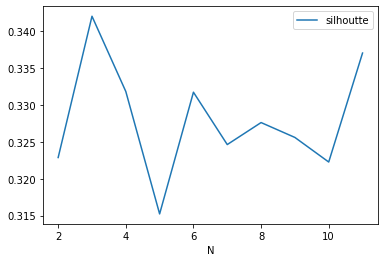

In [ ]:
pd.DataFrame(results).set_index('N').plot.line()

* Dado los resultados que entrega el algoritmo de clasificación utilizado, me quedo con el valor de N=3, que es el nivel de clusters, que posee el mayor valor junto con significar la primera alza en el gráfico

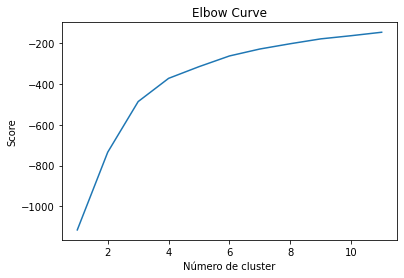

In [ ]:
N = range(1, 12)
kmeans = [KMeans(n_clusters=i) for i in N]
kmeans
score = [kmeans[i].fit(data_trasf).score(data_trasf) for i in range(len(kmeans))]
score
plt.plot(N,score)
plt.xlabel('Número de cluster')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

* El método del codo verifica que el número de cluster adecuado es 3

### 9.Visualizar con el número de clusters óptimo.Caracterizar cada clústeren el mundo real de acuerdo a los resultados obtenidos.

In [ ]:
data_cluster=data_trasf.copy()

In [ ]:
k=3
kmeans=KMeans(n_clusters=k).fit(data_cluster)
centroids = kmeans.cluster_centers_
print(centroids)

[[-7.22734200e-01 -9.00725643e-01  1.00000000e+00]
 [-3.93360325e-01  9.63748553e-01  2.00000000e+00]
 [ 1.15908881e+00 -2.18450371e-01 -1.11022302e-15]]


In [ ]:
data_analisis= data_cluster.merge(data_scale, left_index=True, right_index=True)


In [ ]:
data_analisis.head(10)

,0,1,cluster,leche,congelados,vegetales,abarrotes,limpieza,gourmet
0,1.665185,-1.250068,0,0.658919,-1.279259,0.870389,1.430770,-0.752981,-0.974149
1,2.874696,-0.463760,0,1.047927,-0.042500,1.634834,1.312380,1.315414,-1.738852
2,0.333278,0.176402,0,0.402399,-0.993049,1.529310,-1.158739,-0.312979,0.664092
3,0.576755,-0.381744,0,0.207542,0.100604,1.528279,0.662639,-1.079771,-0.079914
4,1.571731,0.706174,0,-1.085629,-0.972855,1.039845,0.490309,0.941742,-0.347543
5,0.781714,-1.061243,0,1.275201,0.404571,-0.723808,0.942851,1.577263,-0.449241
6,0.405580,-0.938711,0,0.433759,-0.721464,0.199781,0.710275,-0.314715,0.186643
7,-0.290164,0.344129,2,0.830519,0.745794,1.224082,-1.166795,-0.981144,-0.150925
8,-0.603863,-2.304493,1,1.514455,-1.720411,-1.626774,0.410098,-0.251163,1.008440
9,-0.595954,1.157452,2,-1.677598,0.610001,0.678590,-0.059257,0.137095,1.152602


In [ ]:
data_analisis.groupby('cluster')[['vegetales','abarrotes','gourmet','leche','limpieza','congelados']].mean()

,vegetales,abarrotes,gourmet,leche,limpieza,congelados
cluster,,,,,,
0,0.585295,0.461497,-0.583916,0.289176,0.448579,-0.463493
1,-0.544445,0.270300,0.656621,0.568871,-0.454819,0.053422
2,-0.044641,-0.635391,-0.052803,-0.740879,-0.002000,0.359408


* El cluster 0 se inclina en promedio por productos vegetales, abarrotes y productos de limpieza

* El cluster 1 se inclina por productos gourment, leche y abarrotes

* El cluster 2 se inclina por congelados

### 10. Aplicar componentes principales inverso para recuperar los datos originales.

In [ ]:
data_comeback = pd.DataFrame(pca.inverse_transform(data_trasf), columns=pd_data.columns)
data_comeback

,leche,congelados,vegetales,abarrotes,limpieza,gourmet
0,0.999059,-0.915301,0.642365,1.243355,0.488275,-0.550128
1,0.542532,-1.193712,1.413200,1.191758,1.131443,-1.435992
2,-0.097701,-0.085899,0.205172,0.008471,0.170368,-0.232542
3,0.310288,-0.305340,0.231690,0.401782,0.177843,-0.205246
4,-0.373025,-0.433772,0.945006,0.110796,0.782038,-1.060575
...,...,...,...,...,...,...
495,0.162758,-0.147162,0.101668,0.201110,0.077120,-0.086438
496,-0.486069,0.632949,-0.599191,-0.744050,-0.470874,0.573944
497,-0.691424,0.350738,-0.012625,-0.650865,0.013632,-0.080786
498,0.469313,-0.257534,0.038309,0.456217,0.014952,0.023058
